# AI methods for Business

In [118]:
# Importing the basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
pd.set_option('display.max_columns', None)

In [119]:
# Reading the data
df = pd.read_csv("bank_transactions.csv")
df_original_len = len(df)
print('Original length of dataframe:', df_original_len)

Original length of dataframe: 1048567


## ADE

In [120]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-1-1994,F,JAMSHEDPUR,17819.05,2-8-2016,143207,25.0
1,T2,C2142763,4-4-1957,M,JHAJJAR,2270.69,2-8-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2-8-2016,142712,459.0
3,T4,C5342380,14-9-1973,F,MUMBAI,866503.21,2-8-2016,142714,2060.0
4,T5,C9031234,24-3-1988,F,NAVI MUMBAI,6714.43,2-8-2016,181156,1762.5


In [121]:
# Assuming you have a DataFrame named df
data_types = df.dtypes

# Display the data types
print(data_types)

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


In [122]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


### Gender
The dataset used for this analysis displays a noticeable gender imbalance, with a higher representation of male individuals compared to females. This imbalance can have implications for the interpretation of the results and the generalizability of findings.

Within the dataset, a category labeled as 'Gender T' was identified, but it appeared only once. Given its limited occurrence, the decision was made to exclude this category from the dataset to maintain a more balanced analysis. Consequently, the primary focus of the analysis centers on the comparison between male and female individuals.

CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64


C:\Users\joche\AppData\Local\Temp\ipykernel_22168\43928318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustGender', data=df, palette='PuRd')


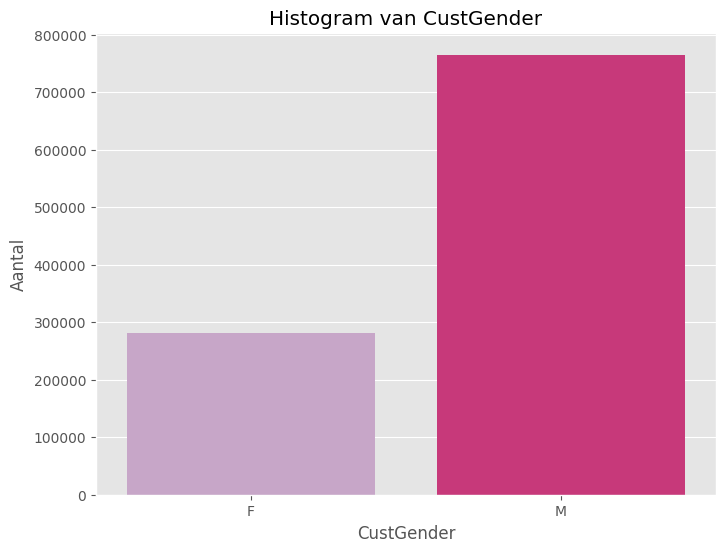

In [123]:
# Frequenties CustGender
frequentietabel = df['CustGender'].value_counts()
print(frequentietabel)

# Drop T within CustGender
df = df[df['CustGender'] != 'T']

# Plot CustGender in a histogram to check distribution

plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
sns.countplot(x='CustGender', data=df, palette='PuRd')
plt.title('Histogram van CustGender')
plt.xlabel('CustGender')
plt.ylabel('Aantal')
plt.show()

### Customer Location 

C:\Users\joche\AppData\Local\Temp\ipykernel_22168\1140593226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(y='CustLocation', data=df, palette='PuRd_r',


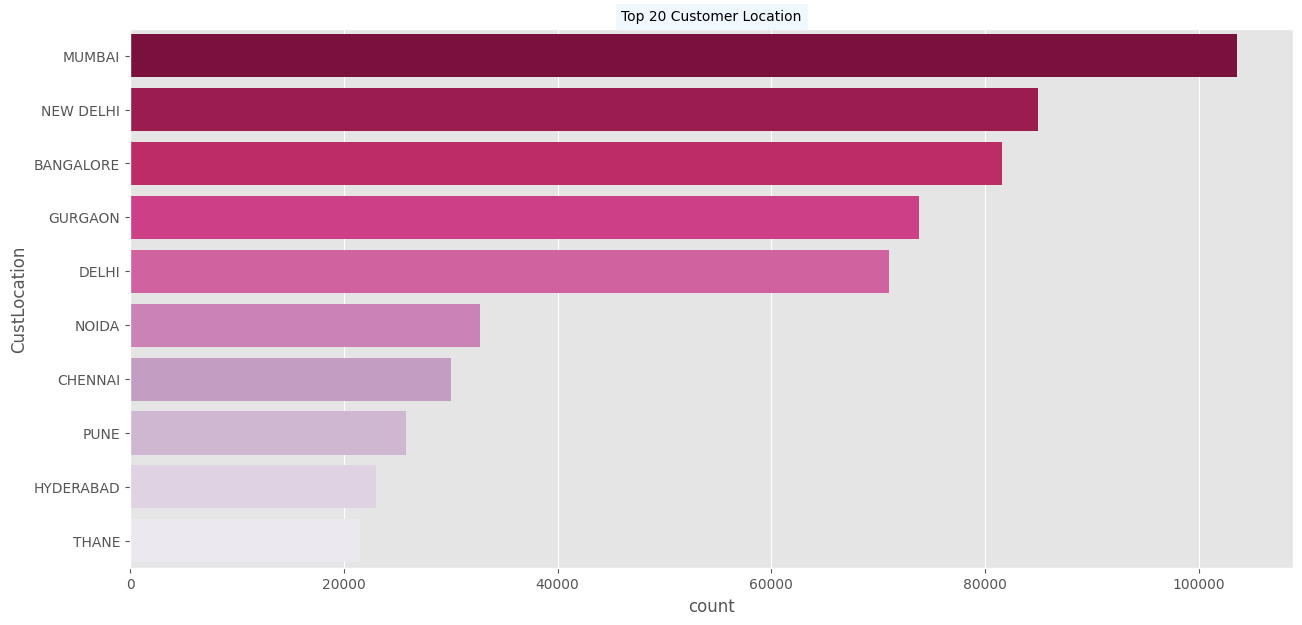

In [124]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 7))
chart = sns.countplot(y='CustLocation', data=df, palette='PuRd_r', 
                     order=df['CustLocation'].value_counts()[:10].index)
plt.title("Top 20 Customer Location",
          fontsize='10',
          backgroundcolor='AliceBlue',
          color='black');


The most transactions were from the location (1) Mumbai followed by New (2) Delhi, (3) Bangalore, (4) Gurgaon and (5) 

In [125]:
descriptives = df['CustAccountBalance'].describe()

# Druk de resultaten af
print(descriptives)

count    1.046197e+06
mean     1.154036e+05
std      8.464858e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


In [126]:


# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)

Number of missing values in 'CustLocation': 151


In [127]:
# # Example data frame (replace this with your actual data)
# data = {'CustLocation': [1.2, np.nan, 3.4, 4.5, np.nan]}
# df = pd.DataFrame(data)

# # Creating the KNN imputer instance
# # You can adjust 'n_neighbors' as needed
# imputer = KNNImputer(n_neighbors=2)

# # Fitting the imputer and transforming the data
# df['CustLocation'] = imputer.fit_transform(df[['CustLocation']])

# # The imputed data frame
# print(df)

In [128]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)

Number of missing values in 'CustLocation': 151


### Custumer data of birth
In our dataset, the "CustomerDOB" feature represents the date of birth of customers. During the initial data preprocessing phase, we created a new feature called "Age" by calculating the age of each customer based on their date of birth. This allowed us to work with a more interpretable and meaningful feature.

However, as we delved deeper into the data, we encountered some anomalies in the distribution of ages derived from this feature. Specifically, we observed instances where customers were reported to be over 200 years old and others with ages below 0, which raised concerns about data accuracy.

To address this issue, we implemented the following steps:

1. **Outlier Handling:** We identified customers with ages below 0 and those with ages exceeding 100 as potential outliers. To maintain data integrity and consistency, we decided to treat these values as missing data (NaN). This step was taken to mitigate the impact of extreme values on our analyses.

2. **Missing Data Imputation:** To impute missing values in the "Age" feature, we employed the K-Nearest Neighbors (KNN) imputation technique with a k-value of 5 neighbors. This method leverages the similarity between data points to estimate and assign appropriate ages for missing values. After imputation, we ensured that the distribution of ages remained comparable to the original distribution, validating the effectiveness of the imputation process.

The decision to address the outliers and impute missing values using KNN with 5 neighbors was based on the desire to maintain data quality and the integrity of our analyses while retaining the overall characteristics of the "Age" feature distribution.

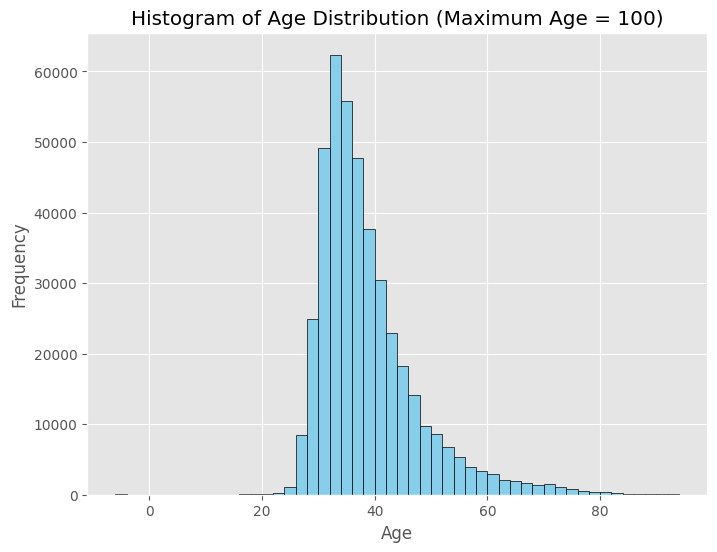

Maximale leeftijd: 94.0
Minimale leeftijd: -6.0
Het aantal rijen in de DataFrame is: 0


In [129]:

# Load your dataset, for example:
# df = pd.read_csv('your_dataset.csv')

# Ensure CustomerDOB is in datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')

# Calculate age
current_date = pd.to_datetime('today')
df['Age'] = (current_date - df['CustomerDOB']).dt.days // 365

# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()
# Ga ervan uit dat je een DataFrame hebt genaamd df met een 'age' kolom
max_age = df['Age'].max()
min_age = df['Age'].min()

# Print de maximale en minimale leeftijd
print(f"Maximale leeftijd: {max_age}")
print(f"Minimale leeftijd: {min_age}")

# Filter de DataFrame waar de leeftijd groter is dan 100
filtered_df = df[df['Age'] > 100]

# Toon de eerste vijf rijen van het gefilterde DataFrame
filtered_df.head()

aantal_rijen = len(filtered_df)
print(f"Het aantal rijen in de DataFrame is: {aantal_rijen}")


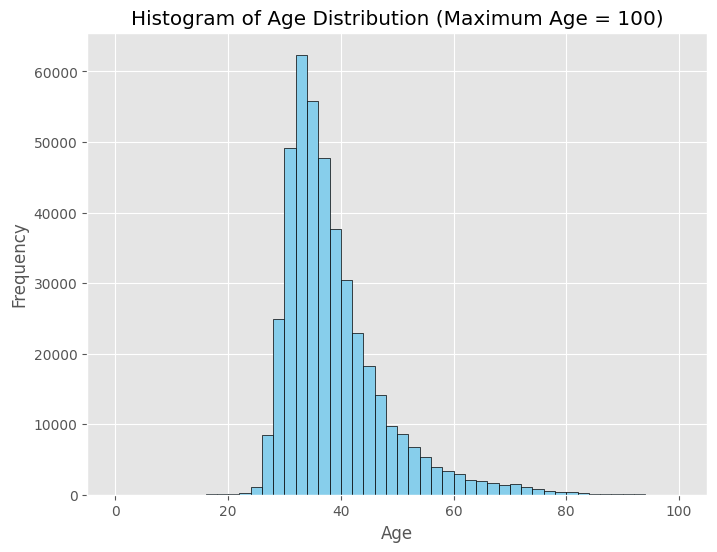

In [130]:
# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, range=(0, 100), color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()

In [131]:
# Replace values greater than 100 with NaN
df.loc[df['Age'] > 100, 'Age'] = np.nan

# Replace values greater than 100 with NaN
df.loc[df['Age'] < 0, 'Age'] = np.nan

# Display the updated DataFrame
print(df)

# Assuming you have a DataFrame named df with an 'Age' column containing NaN values

batch_size = 10000  # Adjust the batch size as needed

# Determine the total number of rows
total_rows = df.shape[0]

# Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Iterate through the data in batches
for start in range(0, total_rows, batch_size):
    end = min(start + batch_size, total_rows)
    batch_df = df.iloc[start:end].copy()  # Create a copy of the batch
    batch_df['Age'] = imputer.fit_transform(batch_df[['Age']])
    df.iloc[start:end] = batch_df  # Update the original DataFrame with the imputed values



        TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053  1994-10-01          F     JAMSHEDPUR   
1                  T2   C2142763  1957-04-04          M        JHAJJAR   
2                  T3   C4417068         NaT          F         MUMBAI   
3                  T4   C5342380         NaT          F         MUMBAI   
4                  T5   C9031234         NaT          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1048562      T1048563   C8020229  1990-08-04          M      NEW DELHI   
1048563      T1048564   C6459278         NaT          M         NASHIK   
1048564      T1048565   C6412354         NaT          M      HYDERABAD   
1048565      T1048566   C6420483         NaT          M  VISAKHAPATNAM   
1048566      T1048567   C8337524  1984-05-03          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05        2-8-2016    

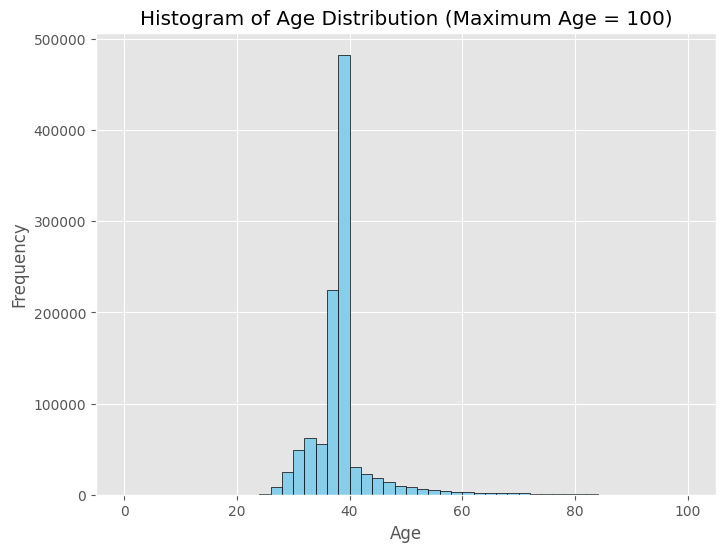

In [132]:
# Create a histogram of the 'Age' feature with a maximum x-axis value of 100
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=50, range=(0, 100), color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution (Maximum Age = 100)')

# Show the plot
plt.show()

### CustAccountBalance
The "CustAccountBalance" feature in our dataset exhibits a distinct right-skewed distribution, characterized by a few data points with exceptionally high values that extend the tail of the distribution. This skewness is reflected in the statistical summary:

- **Mean (Average):** The mean "CustAccountBalance" is approximately 115,403,600 INR (Indian Rupees), indicating the central tendency of the data. However, it is noteworthy that the mean is influenced by the presence of outliers, particularly those with significantly higher balances.

- **Standard Deviation:** The standard deviation of approximately 845,529 INR quantifies the degree of dispersion or variability within the "CustAccountBalance" values. The relatively large standard deviation suggests a wide spread of account balances, with some accounts exhibiting substantial deviations from the mean.

- **Minimum Value:** The minimum "CustAccountBalance" is 0 INR, which represents the lowest observed account balance in our dataset.

- **Maximum Value:** The maximum "CustAccountBalance" is an impressive 115,035,500 INR, signifying the presence of accounts with substantial holdings.

In [133]:
# Use describe() for the 'CustAccountBalance' feature
cust_balance_description = df['CustAccountBalance'].describe()

# Display the description
print(cust_balance_description)

count    1.046197e+06
mean     1.154036e+05
std      8.464858e+05
min      0.000000e+00
25%      4.721760e+03
50%      1.679218e+04
75%      5.765736e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64


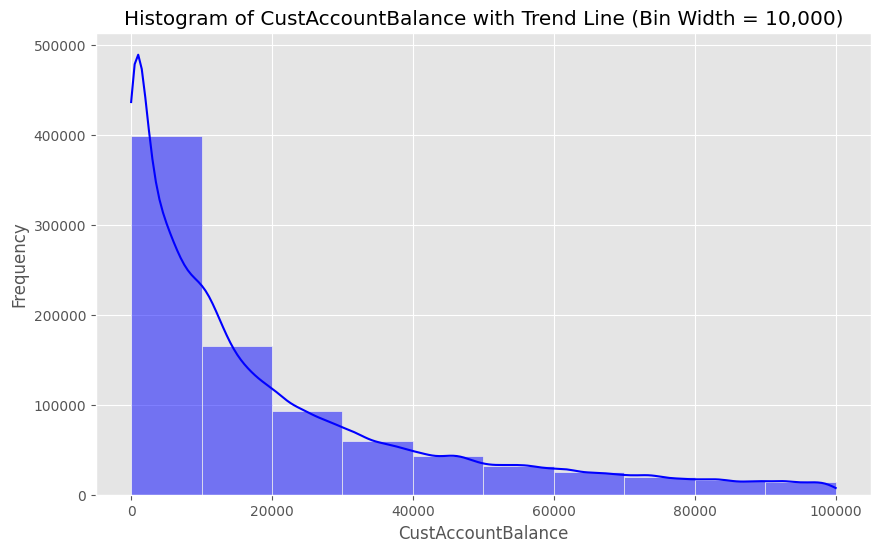

In [134]:
# Filter the data to include values less than or equal to 100,000
filtered_data = df[df['CustAccountBalance'] <= 100000]

# Create a histogram with larger bins (10,000 increments) and a trend line
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['CustAccountBalance'], kde=True, color='blue', binwidth=10000)

# Set labels and title
plt.xlabel('CustAccountBalance')
plt.ylabel('Frequency')
plt.title('Histogram of CustAccountBalance with Trend Line (Bin Width = 10,000)')

# Show the plot
plt.show()


### TransactionDate
We analyzed transaction patterns based on the "DayOfWeek" feature derived from "TransactionDate." Here's what we found:

- **Tuesday**: Transactions are relatively higher on Tuesdays.

- **Thursday**: Transactions are relatively lower on Thursdays.

However, the differences between days are relatively small, suggesting a fairly uniform distribution of transactions throughout the week.


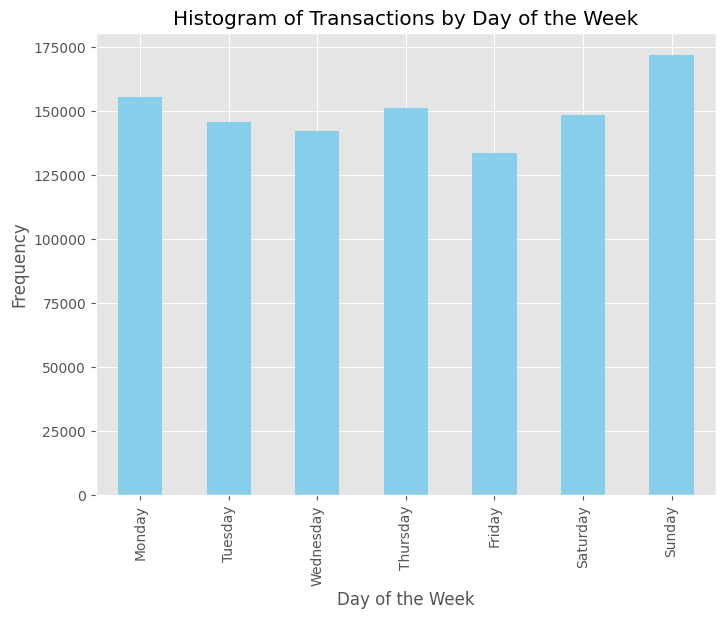

In [135]:


df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d-%m-%Y')
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

df.head()


# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a histogram
plt.figure(figsize=(8, 6))
df['DayOfWeek'].value_counts().loc[days_order].plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram of Transactions by Day of the Week')

# Show the plot
plt.show()

### TransactionTime	


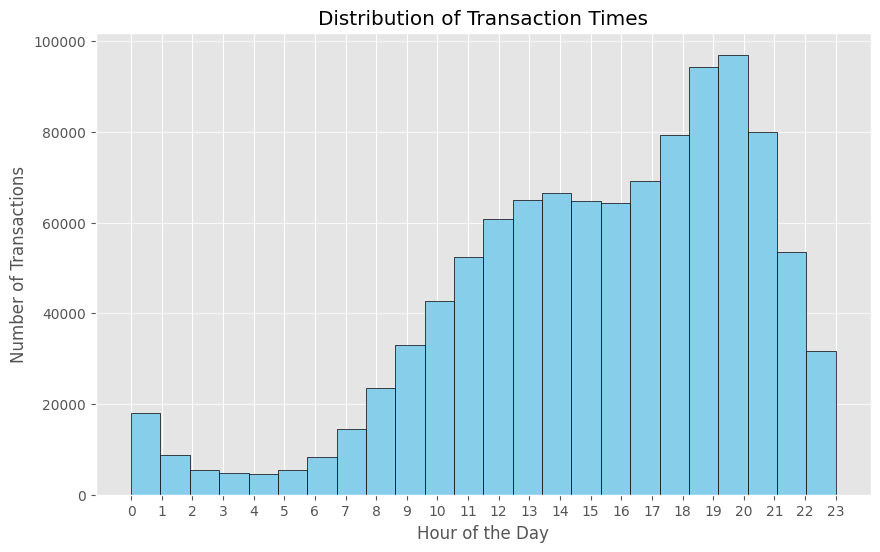

In [136]:
# Convert the TransactionTime to a more readable format (hours)
df['TransactionHour'] = df['TransactionTime'] // 10000

# Plotting the distribution of transaction times
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionHour'], bins=24, edgecolor='black', color='skyblue')
plt.title('Distribution of Transaction Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

### TransactionAmount (INR)

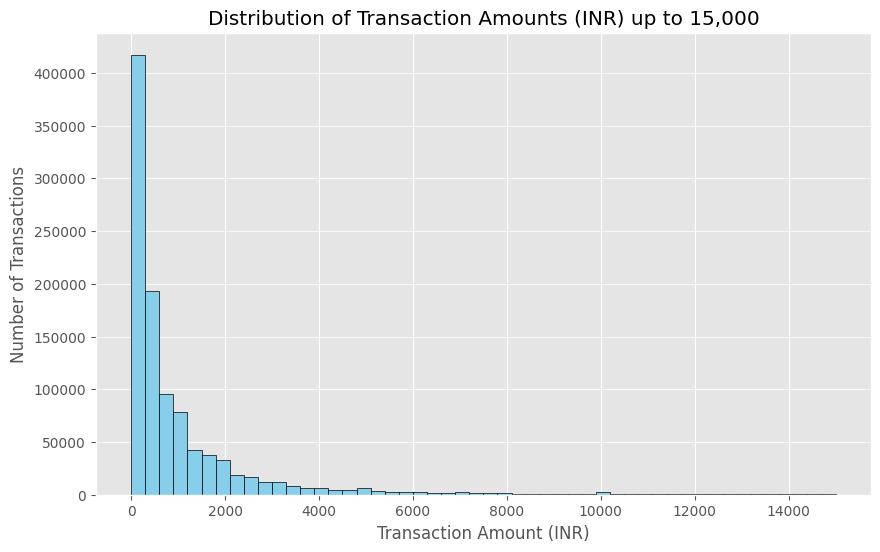

In [137]:
# Plot the distribution of transaction amounts focusing on amounts up to 15,000 INR
plt.figure(figsize=(10, 6))
plt.hist(df['TransactionAmount (INR)'], bins=50, edgecolor='black', color='skyblue', range=(0, 15000))
plt.title('Distribution of Transaction Amounts (INR) up to 15,000')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Corelation Matrix 

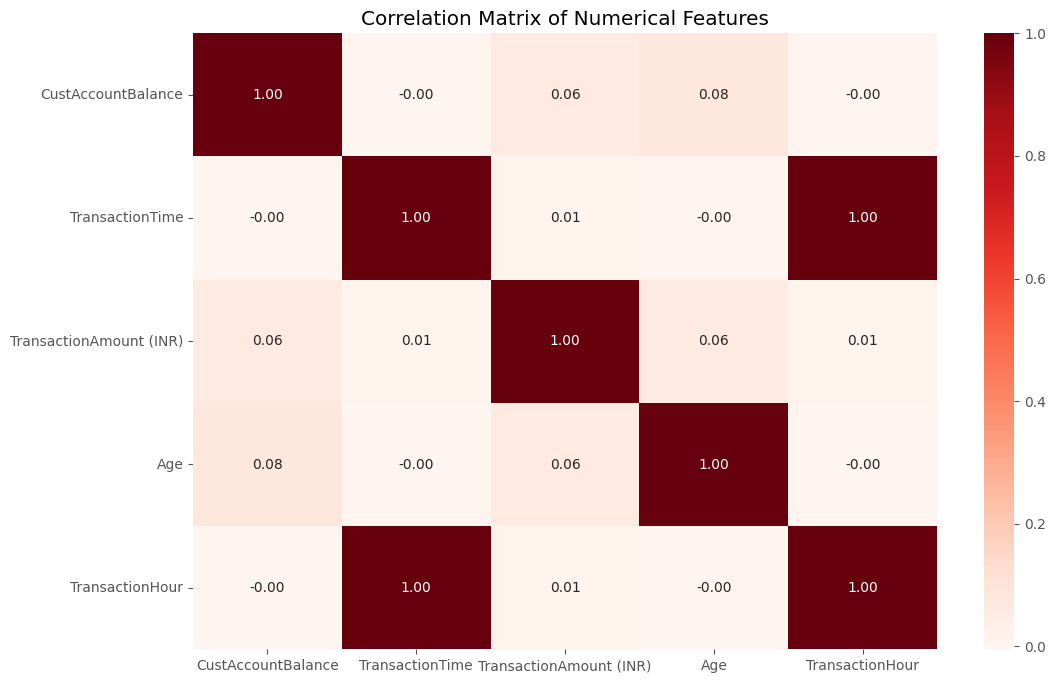

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DayOfWeek,TransactionHour
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,29.000000,Tuesday,14
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,66.000000,Tuesday,14
2,T3,C4417068,NaT,F,MUMBAI,17874.44,2016-08-02,142712,459.0,38.345739,Tuesday,14
3,T4,C5342380,NaT,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,38.345739,Tuesday,14
4,T5,C9031234,NaT,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,38.345739,Tuesday,18


In [138]:
# Selecting only the numerical columns for correlation analysis
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Define a custom color palette with various shades of pink
custom_palette = sns.color_palette("Reds", as_cmap=True)

# Plotting the correlation matrix using the custom palette
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

df.head()

In [139]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values per column
print(missing_values)

TransactionID                   0
CustomerID                      0
CustomerDOB                622445
CustGender                   1100
CustLocation                  151
CustAccountBalance           2369
TransactionDate                 0
TransactionTime                 0
TransactionAmount (INR)         0
Age                             0
DayOfWeek                       0
TransactionHour                 0
dtype: int64


In [140]:
# Label Encoder for 'CustLocation' ### DIT HOORT NOG BIJ FEATURE ENGIEURING
label_encoder = LabelEncoder()
df['CustLocation_Encoded'] = label_encoder.fit_transform(df['CustLocation'])

# Now apply KNNImputer to the encoded 'CustLocation'
knn_imputer = KNNImputer(n_neighbors=5)
df['CustLocation_Imputed'] = knn_imputer.fit_transform(df[['CustLocation_Encoded']])

# Convert the imputed values back to the original categories
df['CustLocation_Imputed'] = label_encoder.inverse_transform(df['CustLocation_Imputed'].astype(int))

# Check the results
print(df[['CustLocation', 'CustLocation_Encoded', 'CustLocation_Imputed']].head())

  CustLocation  CustLocation_Encoded CustLocation_Imputed
0   JAMSHEDPUR                  3586           JAMSHEDPUR
1      JHAJJAR                  3648              JHAJJAR
2       MUMBAI                  5268               MUMBAI
3       MUMBAI                  5268               MUMBAI
4  NAVI MUMBAI                  5657          NAVI MUMBAI


In [141]:
# Grouping and aggregating the data, including the first day of the week of a transaction
grouped_data = df.groupby('CustomerID').agg(
    frequency=('TransactionID', 'count'),  # Total number of transactions
    Transaction_Amount=('TransactionAmount (INR)', 'mean'),  # Average transaction amount
    TransactionTime=('TransactionTime', 'mean'),  # Average transaction time
    AccountBalance=('CustAccountBalance', 'mean'),  # Average account balance
    Gender=('CustGender', 'first'),  # Customer gender
    Age=('Age', 'first'),  # First recorded age of the customer
    Location=('CustLocation', 'first'),  # First recorded location of the customer
    TransactionDate=('TransactionDate', 'first'),  # First transaction date
    DayOfWeek=('DayOfWeek', 'first')  # First day of the week of a transaction
).reset_index()

# Sorting based on the total number of transactions
grouped_data = grouped_data.sort_values(by='frequency', ascending=False)

# Display the first few rows of the grouped dataset
grouped_data.head()

,CustomerID,frequency,Transaction_Amount,TransactionTime,AccountBalance,Gender,Age,Location,TransactionDate,DayOfWeek
497426,C5533885,6,475.756667,184782.333333,23088.798333,M,33.000000,KOLKATA,2016-09-25,Sunday
628691,C6735477,6,417.333333,152341.166667,84234.390000,M,37.906837,SONITPUR,2016-08-01,Monday
716853,C7537344,6,3599.583333,106194.166667,22066.763333,F,40.000000,HYDERABAD,2016-08-01,Monday
83551,C1736254,6,925.750000,146075.833333,579921.823333,F,34.000000,AHMEDABAD,2016-08-01,Monday
330644,C4021562,6,1632.671667,164670.333333,98384.980000,M,38.245490,LUDHIANA,2016-08-03,Wednesday


In [142]:
grouped_data = grouped_data.drop(["TransactionDate","CustomerID"], axis=1)

In [143]:
grouped_data.head()

,frequency,Transaction_Amount,TransactionTime,AccountBalance,Gender,Age,Location,DayOfWeek
497426,6,475.756667,184782.333333,23088.798333,M,33.000000,KOLKATA,Sunday
628691,6,417.333333,152341.166667,84234.390000,M,37.906837,SONITPUR,Monday
716853,6,3599.583333,106194.166667,22066.763333,F,40.000000,HYDERABAD,Monday
83551,6,925.750000,146075.833333,579921.823333,F,34.000000,AHMEDABAD,Monday
330644,6,1632.671667,164670.333333,98384.980000,M,38.245490,LUDHIANA,Wednesday


In [144]:
# Frequency Encoding of the 'CustLocation' column
location_frequency = grouped_data['Location'].value_counts(normalize=True)
grouped_data['Location_Frequency'] = grouped_data['Location'].map(location_frequency)

# Display the first few rows of the updated dataset
grouped_data.head()


,frequency,Transaction_Amount,TransactionTime,AccountBalance,Gender,Age,Location,DayOfWeek,Location_Frequency
497426,6,475.756667,184782.333333,23088.798333,M,33.000000,KOLKATA,Sunday,0.018942
628691,6,417.333333,152341.166667,84234.390000,M,37.906837,SONITPUR,Monday,0.000069
716853,6,3599.583333,106194.166667,22066.763333,F,40.000000,HYDERABAD,Monday,0.022066
83551,6,925.750000,146075.833333,579921.823333,F,34.000000,AHMEDABAD,Monday,0.011712
330644,6,1632.671667,164670.333333,98384.980000,M,38.245490,LUDHIANA,Wednesday,0.004704


In [145]:
# One-Hot Encoding for 'CustGender' and 'TransactionWeekday'
gender_dummies = pd.get_dummies(grouped_data['Gender'], prefix='Gender1')
weekday_dummies = pd.get_dummies(grouped_data['DayOfWeek'], prefix='Weekday')

# Merging the new dummy columns with the original dataset
data_encoded = pd.concat([grouped_data, gender_dummies, weekday_dummies], axis=1)

# Dropping the original columns 'CustGender' and 'TransactionWeekday'
data_encoded = data_encoded.drop(['Gender', 'DayOfWeek', 'Location'], axis=1)

# Displaying the first few rows of the updated dataframe
data_encoded.head()

,frequency,Transaction_Amount,TransactionTime,AccountBalance,Age,Location_Frequency,Gender1_F,Gender1_M,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
497426,6,475.756667,184782.333333,23088.798333,33.000000,0.018942,False,True,False,False,False,True,False,False,False
628691,6,417.333333,152341.166667,84234.390000,37.906837,0.000069,False,True,False,True,False,False,False,False,False
716853,6,3599.583333,106194.166667,22066.763333,40.000000,0.022066,True,False,False,True,False,False,False,False,False
83551,6,925.750000,146075.833333,579921.823333,34.000000,0.011712,True,False,False,True,False,False,False,False,False
330644,6,1632.671667,164670.333333,98384.980000,38.245490,0.004704,False,True,False,False,False,False,False,False,True


In [146]:
# Select only the numeric columns for scaling
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric data
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# View the first few rows of the scaled data
print(data_encoded.head())


        frequency  Transaction_Amount  TransactionTime  AccountBalance  \
497426  10.681989           -0.170572         0.564256       -0.114910   
628691  10.681989           -0.179640        -0.097146       -0.038595   
716853  10.681989            0.314271        -1.037978       -0.116185   
83551   10.681989           -0.100729        -0.224882        0.580062   
330644  10.681989            0.008991         0.154218       -0.020934   

             Age  Location_Frequency  Gender1_F  Gender1_M  Weekday_Friday  \
497426 -0.918789           -0.487882      False       True           False   
628691 -0.057127           -0.997844      False       True           False   
716853  0.310441           -0.403474       True      False           False   
83551  -0.743185           -0.683255       True      False           False   
330644  0.002342           -0.872607      False       True           False   

        Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
497426  

In [147]:
# Calculate the number of missing values in each column
missing_values = data_encoded.isnull().sum()

# Print the number of missing values per column
print(missing_values)


frequency                0
Transaction_Amount       0
TransactionTime          0
AccountBalance        1665
Age                      0
Location_Frequency     114
Gender1_F                0
Gender1_M                0
Weekday_Friday           0
Weekday_Monday           0
Weekday_Saturday         0
Weekday_Sunday           0
Weekday_Thursday         0
Weekday_Tuesday          0
Weekday_Wednesday        0
dtype: int64


In [148]:
# Verwijder rijen waar 'Location' of 'AccountBalance' ontbreekt
data_encoded = data_encoded.dropna(subset=['Location_Frequency', 'AccountBalance'])

# Resultaat
print(data_encoded.head())



        frequency  Transaction_Amount  TransactionTime  AccountBalance  \
497426  10.681989           -0.170572         0.564256       -0.114910   
628691  10.681989           -0.179640        -0.097146       -0.038595   
716853  10.681989            0.314271        -1.037978       -0.116185   
83551   10.681989           -0.100729        -0.224882        0.580062   
330644  10.681989            0.008991         0.154218       -0.020934   

             Age  Location_Frequency  Gender1_F  Gender1_M  Weekday_Friday  \
497426 -0.918789           -0.487882      False       True           False   
628691 -0.057127           -0.997844      False       True           False   
716853  0.310441           -0.403474       True      False           False   
83551  -0.743185           -0.683255       True      False           False   
330644  0.002342           -0.872607      False       True           False   

        Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
497426  

In [149]:
# Bereken het aantal ontbrekende waarden in elke kolom
missing_values = data_encoded.isnull().sum()

# Print het aantal ontbrekende waarden per kolom
print(missing_values)


frequency             0
Transaction_Amount    0
TransactionTime       0
AccountBalance        0
Age                   0
Location_Frequency    0
Gender1_F             0
Gender1_M             0
Weekday_Friday        0
Weekday_Monday        0
Weekday_Saturday      0
Weekday_Sunday        0
Weekday_Thursday      0
Weekday_Tuesday       0
Weekday_Wednesday     0
dtype: int64


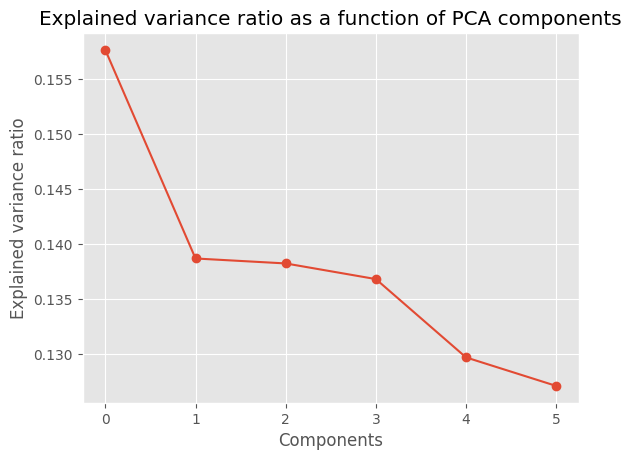

In [150]:
# Create a PCA instance with the desired number of components
trial_pca = PCA(n_components=6)

# Fit PCA to the scaled data (assuming data_encoded is your scaled dataset)
trial_pca.fit(data_encoded)

# Transform the data using PCA
test = trial_pca.transform(data_encoded)

# Plot the explained variance ratio as a function of PCA components
plt.plot(list(trial_pca.explained_variance_ratio_), '-o')
plt.title('Explained variance ratio as a function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.show()


In [151]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


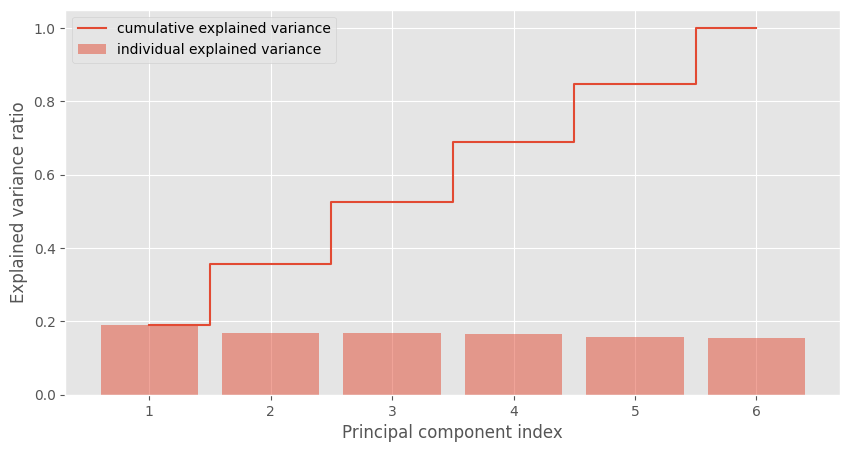

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Verwijder niet-numerieke kolommen
grouped_data_numeric = data_encoded.select_dtypes(include=[np.number])

# Voer PCA uit op de numerieke data
pca = PCA()
pca_comps = pca.fit_transform(grouped_data_numeric)  # pca components
var_exp = pca.explained_variance_ratio_  # variance explained ratio 
cum_var_exp = np.cumsum(var_exp)  # cumulative variance

# Plot van uitgelegde varianties
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()



In [153]:
# Set the threshold for the explained variance you want to achieve
var_exp_thres = 0.80

# Create a PCA instance with the desired threshold for explained variance
pca = PCA(var_exp_thres)

# Apply PCA to the scaled dataset
pca_comps = pca.fit_transform(grouped_data_numeric)

# Print the number of components needed to explain the desired amount of variance
print('Number of components to explain {:0.0f}% variance: {}'.format(var_exp_thres * 100, pca.n_components_))


Number of components to explain 80% variance: 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your dataset
reduced_features = data_encoded

WCSS = []
silh_scores_kmeans = []
db_scores_kmeans = []

for n_cluster in range(2, 11):
    model_kmeans = KMeans(n_clusters=n_cluster)
    model_kmeans.fit(reduced_features)
    WCSS.append(model_kmeans.inertia_)
    silh_scores_kmeans.append(silhouette_score(reduced_features, model_kmeans.labels_))
    db_scores_kmeans.append(davies_bouldin_score(reduced_features, model_kmeans.labels_))

plt.style.use("fivethirtyeight")
kl = KneeLocator(range(2, 11), WCSS, curve='convex', direction="decreasing")

plt.plot(range(2, 11), WCSS, color='purple', marker='o', label='Elbow Method')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters", labelpad=20)
plt.ylabel("Inertia", labelpad=20)
plt.title("Elbow Method")

# Vertical line indicating the elbow point
plt.axvline(x=kl.elbow, color='black', label='Elbow Point', ls='--', linewidth=3)

# Display the plot
plt.show()


In [154]:
# Assuming you want to change the data type of "CustLocation" to integer without handling non-finite values
df['CustLocation'] = df['CustLocation'].astype(int, errors='ignore')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DayOfWeek,TransactionHour,CustLocation_Encoded,CustLocation_Imputed
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,29.000000,Tuesday,14,3586,JAMSHEDPUR
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,66.000000,Tuesday,14,3648,JHAJJAR
2,T3,C4417068,NaT,F,MUMBAI,17874.44,2016-08-02,142712,459.0,38.345739,Tuesday,14,5268,MUMBAI
3,T4,C5342380,NaT,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,38.345739,Tuesday,14,5268,MUMBAI
4,T5,C9031234,NaT,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,38.345739,Tuesday,18,5657,NAVI MUMBAI


In [155]:
# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)


Number of missing values in 'CustLocation': 151


In [156]:
# Create a copy of the DataFrame with only the "CustLocation" column
df_to_impute = df[['CustLocation']]

# Initialize the KNNImputer with the desired number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer to fill in missing values
df_imputed = imputer.fit_transform(df_to_impute)

# Replace the original "CustLocation" column with the imputed values
df['CustLocation'] = df_imputed

# Count the number of missing values in the "CustLocation" column
missing_values_count = df['CustLocation'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'CustLocation':", missing_values_count)



ValueError: could not convert string to float: 'JAMSHEDPUR'

In [ ]:
# Assuming you want to remove decimals and change the column name
df['CustLocation'] = df['CustLocation'].astype(int)  # Remove decimals
df = df.rename(columns={"CustLocation": "LocationID"})  # Change column name
df.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
## feature scaling
from sklearn.preprocessing import StandardScaler
# define standard scaler instance
scaler = StandardScaler()
# Fitting the StandardScaler to df
scaler.fit(df)
# Scaling df used the fitting Standard scalar
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

ValueError: could not convert string to float: 'F'

In column CustomerDOB 0.3% is NAN value 
In column NAN_CustLocation 0.3% is NAN vlaue
IN column NAN_CustAccountBalance 0.2% is NAN value

De hoogste waarde in de kolom is: 115035495.1
De laagste waarde in de kolom is: 0.0


In [ ]:
Highest_frequencie = df['CustAccountBalance'].value_counts()

# Haal de hoogste frequentie op
Higest_count = Highest_frequencie.max()

print(f'De hoogste frequentie van dezelfde waarden in de kolom is: {Higest_count}')

De hoogste frequentie van dezelfde waarden in de kolom is: 2711


In [ ]:
# Vervang dit met de naam van uw bestand

# Selecteer de kolommen voor KNN imputatie
# In dit geval kiezen we alleen CustAccountBalance, maar KNN werkt beter als het meer kenmerken heeft om 'buren' te bepalen
impute_columns = ['CustAccountBalance']

# Normaliseer de numerieke gegevens voor KNN-imputatie
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[impute_columns])

# Stel de KNN imputer in
imputer = KNNImputer(n_neighbors=5)  # U kunt het aantal buren aanpassen

# Voer de imputatie uit
imputed_values = imputer.fit_transform(scaled_values)

# Transformeer de waarden terug naar de originele schaal
df[impute_columns] = scaler.inverse_transform(imputed_values)

# Opslaan van de opgeschoonde dataset
df.to_csv('cleaned_dataset_knn.csv', index=False)
# Impute missing values
# For CustomerDOB, CustGender, and CustLocation, we use the mode (most common value)
for column in ['CustomerDOB', 'CustGender', 'CustLocation']:
    most_common = df[column].mode()[0]
    df[column].fillna(most_common, inplace=True)

In [ ]:
# Gebruik value_counts om de frequentie van elke CustomerID te berekenen
customer_id_counts = df['CustomerID'].value_counts()

# Toon de resultaten
print(customer_id_counts)

CustomerID
C3226689    6
C1113684    6
C1026833    6
C1736254    6
C7537344    6
           ..
C8716232    1
C4474828    1
C3341662    1
C6821983    1
C6420483    1
Name: count, Length: 884264, dtype: int64


In [ ]:
# Gebruik nunique() om het aantal unieke steden te berekenen
unique_cities_count = df['CustLocation'].nunique()

# Toon het resultaat
print("Aantal verschillende steden:", unique_cities_count)

Aantal verschillende steden: 9355


In [ ]:


# Tel hoe vaak elke richting voorkomt in de 'CustLocation' kolom
richtingen = ['south', 'west', 'east', 'north']
tellingen = {richting: df['CustLocation'].str.contains(richting, case=False).sum() for richting in richtingen}

# Print de resultaten
for richting, aantal in tellingen.items():
    print(f"Aantal keer dat '{richting}' voorkomt: {aantal}")


Aantal keer dat 'south' voorkomt: 1983
Aantal keer dat 'west' voorkomt: 5152
Aantal keer dat 'east' voorkomt: 4685
Aantal keer dat 'north' voorkomt: 2703


In [ ]:
# Assuming your DataFrame is named df
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # Convert to datetime
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

In [ ]:
 # Calculate the frequency of each 'CustomerID' and create a new column 'CustomerFrequency'
df['CustomerFrequency'] = df['CustomerID'].map(df['CustomerID'].value_counts())

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,DayOfWeek,CustomerFrequency
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.000000,Monday,1
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,36.102824,Monday,1
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27.000000,Monday,1
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50.000000,Monday,2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35.000000,Monday,1


In [ ]:
# Drop the 'TransactionID' column
df.drop('TransactionID', axis=1, inplace=True)

In [ ]:
# Ga ervan uit dat je een DataFrame hebt genaamd df met een 'age' kolom
max_age = df['Age'].max()
min_age = df['Age'].min()

# Print de maximale en minimale leeftijd
print(f"Maximale leeftijd: {max_age}")
print(f"Minimale leeftijd: {min_age}")

Maximale leeftijd: 51.0
Minimale leeftijd: 0.0


In [ ]:
# Replace values greater than 100 with NaN
df.loc[df['Age'] > 100, 'Age'] = np.nan

# Drop rows where 'Age' is less than 0
df = df.drop(df[df['Age'] < 0].index)

# Display the updated DataFrame
print(df)

        CustomerID CustomerDOB CustGender   CustLocation  CustAccountBalance  \
0         C5841053  1994-10-01          F     JAMSHEDPUR            17819.05   
1         C2142763  2057-04-04          M        JHAJJAR             2270.69   
2         C4417068  1996-11-26          F         MUMBAI            17874.44   
3         C5342380  1973-09-14          F         MUMBAI           866503.21   
4         C9031234  1988-03-24          F    NAVI MUMBAI             6714.43   
...            ...         ...        ...            ...                 ...   
1048562   C8020229  1990-08-04          M      NEW DELHI             7635.19   
1048563   C6459278  1992-02-20          M         NASHIK            27311.42   
1048564   C6412354  1989-05-18          M      HYDERABAD           221757.06   
1048565   C6420483  1978-08-30          M  VISAKHAPATNAM            10117.87   
1048566   C8337524  1984-05-03          M           PUNE            75734.42   

        TransactionDate  TransactionTim